<a href="https://colab.research.google.com/github/nellaadrs/kelompokpro-1/blob/main/uaspsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Isnain Faiziah (200411100007)

Nella Adrisia Hartono (200411100107)

In [1]:
!pip install pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/prosaindata/tugas/SMGR.JK.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,6875.0,6975.0,6700.0,6900.0,6610.801758,9268400
1,2022-06-16,6950.0,6975.0,6825.0,6900.0,6610.801758,9092600
2,2022-06-17,6850.0,6900.0,6725.0,6825.0,6538.945313,6241400
3,2022-06-20,6875.0,7125.0,6750.0,7100.0,6802.418945,11256500
4,2022-06-21,7200.0,7250.0,7125.0,7150.0,6850.323730,12640500
...,...,...,...,...,...,...,...
242,2023-06-08,5850.0,5900.0,5800.0,5875.0,5875.000000,6741600
243,2023-06-09,5875.0,5950.0,5850.0,5925.0,5925.000000,5821700
244,2023-06-12,5950.0,6050.0,5925.0,6050.0,6050.000000,11212000
245,2023-06-13,6100.0,6100.0,6000.0,6000.0,6000.000000,8181800


<Axes: xlabel='Date'>

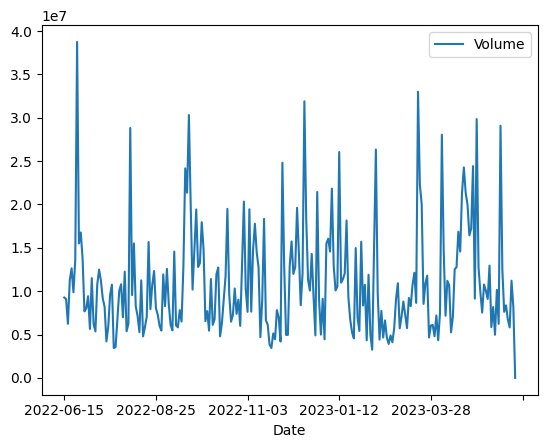

In [6]:
df.plot(x='Date', y ='Volume')

In [7]:
training_set = df.iloc[:197, 1:-1].values
test_set = df.iloc[49:, 1:-1].values

In [8]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [9]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
x = 5
for i in range(x, 197):
    X_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [10]:
xtrainbaru = np.reshape(X_train, (192, 5))

In [11]:
xtrainbaru

array([[0.38461538, 0.41758242, 0.37362637, 0.38461538, 0.52747253],
       [0.41758242, 0.37362637, 0.38461538, 0.52747253, 0.51648352],
       [0.37362637, 0.38461538, 0.52747253, 0.51648352, 0.50549451],
       [0.38461538, 0.52747253, 0.51648352, 0.50549451, 0.6043956 ],
       [0.52747253, 0.51648352, 0.50549451, 0.6043956 , 0.73626374],
       [0.51648352, 0.50549451, 0.6043956 , 0.73626374, 0.58241758],
       [0.50549451, 0.6043956 , 0.73626374, 0.58241758, 0.48351648],
       [0.6043956 , 0.73626374, 0.58241758, 0.48351648, 0.58241758],
       [0.73626374, 0.58241758, 0.48351648, 0.58241758, 0.49450549],
       [0.58241758, 0.48351648, 0.58241758, 0.49450549, 0.38461538],
       [0.48351648, 0.58241758, 0.49450549, 0.38461538, 0.35164835],
       [0.58241758, 0.49450549, 0.38461538, 0.35164835, 0.30769231],
       [0.49450549, 0.38461538, 0.35164835, 0.30769231, 0.32967033],
       [0.38461538, 0.35164835, 0.30769231, 0.32967033, 0.28571429],
       [0.35164835, 0.30769231, 0.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
modelknn=neigh.fit(xtrainbaru, y_train)

In [13]:
# Definisikan dataset_train dan dataset_test
dataset_train = df.iloc[:197, 1:2]  # Menggunakan 45 baris pertama sebagai data latihan
dataset_test = df.iloc[49:, 1:2]  # Menggunakan baris setelah 45 sebagai data uji

# Menggabungkan dataset_train dan dataset_test
dataset_total = pd.concat([dataset_train, dataset_test], axis=0)

# Mengambil input dari dataset_total
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values

In [14]:
inputs = inputs.reshape(-1,1)

In [15]:
inputs =sc.fit_transform(inputs)
X_test = []
for i in range(5, 24):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(19, 5, 1)


In [16]:
xtestbaru = np.reshape(X_test, (19, 5))

In [17]:
predicted_pass = modelknn.predict(xtestbaru)

predicted_pass = predicted_pass.reshape(-1,1)
prediksi= sc.inverse_transform(predicted_pass)
dataset_test=dataset_test.iloc[0:19]

In [18]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

0.10442803735152079

In [21]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf')
model=svm.fit(xtrainbaru, y_train)
# Definisikan dataset_train dan dataset_test
dataset_train = df.iloc[:197, 1:2]  # Menggunakan 45 baris pertama sebagai data latihan
dataset_test = df.iloc[49:, 1:2]  # Menggunakan baris setelah 45 sebagai data uji
# Menggabungkan dataset_train dan dataset_test
dataset_total = pd.concat([dataset_train, dataset_test], axis=0)

In [23]:

 #Mengambil input dari dataset_total
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values
inputs = inputs.reshape(-1,1)
xtestbaru = np.reshape(X_test, (19, 5))
inputs =sc.fit_transform(inputs)
X_test = []
for i in range(5, 24):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(19, 5, 1)


In [24]:

xtestbaru = np.reshape(X_test, (19, 5))
predicted_pass = model.predict(xtestbaru)

predicted_pass = predicted_pass.reshape(-1,1)
prediksi= sc.inverse_transform(predicted_pass)
dataset_test=dataset_test.iloc[0:19]
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

0.1783864063649235